# Zadanie domowe - EDA Danych dotyczących Irysów

* Twoim zadaniem jest wykonanie analizy danych zawartych w załączonym pliku CSV (`25__iris.csv`).
* Plik znajduje się pod video. Pamiętaj, żeby wrzucić plik do tego samego folderu, w którym znajduje się ten notebook.
* Wykorzystaj nowo nabytą wiedzę z biblioteki `Pandas`
* Jeżeli jest taka konieczność posiłkuj się [code explainerem](https://codeexplainer.imprv.ai/) lub / i [data chatterem](https://datachatter.imprv.ai/) (który również te dane ma dostępne).
* Prześlij na discordzie notebook z rozwiązaniem (`#modul-4-zad1`)
* Pamiętaj:

1. Nie spiesz się
2. Potraktuj zadanie domowe jak prawdziwy projekt
3. Dodawaj opisy, obserwacje, wnioski
4. Dodaj wizualizacje
5. Dodaj konkluzję i wnioski końcowe

Powodzenia!!! I mega zabawy!

## O Danych

Zbiór danych zawiera informacje o trzech gatunkach irysów: Iris setosa, Iris versicolor, i Iris virginica.

Dane obejmują pomiary czterech cech: długość i szerokość działki kielicha oraz długość i szerokość płatka.

Każdy wiersz w zbiorze danych reprezentuje pojedynczy kwiat, a wartości pomiarów są podane w centymetrach.

Zbiór składa się z 150 próbek, po 50 dla każdego gatunku, i jest szeroko stosowany jako podstawowy zbiór danych do
testowania algorytmów klasyfikacji oraz w nauce o danych i uczeniu maszynowym.

Kolumny:
* **długość kielicha (sepal length)** - Długość kielicha w cm
* **szerokość kielicha (sepal width)** - Szerokość kielicha w cm
* **długość płatka (petal length)** - Długość płatka w cm
* **szerokość płatka (petal width)** - Szerokość płatka w cm
* **klasa (class)** - Klasa irysa (setosa, versicolor, virginica)

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('25__iris.csv', sep=",")

# Analiza danych

## 1. Ogólny przegląd danych

### Przegląd 10 losowych rekordów

In [3]:
df.sample(10)

,długość kielicha (sepal length),szerokość kielicha (sepal width),długość płatka (petal length),szerokość płatka (petal width),klasa (class)
37,4.9,3.1,1.5,0.1,Iris-setosa
112,6.8,3.0,5.5,2.1,Iris-virginica
69,5.6,2.5,3.9,1.1,Iris-versicolor
25,5.0,3.0,1.6,0.2,Iris-setosa
49,5.0,3.3,1.4,0.2,Iris-setosa
103,6.3,2.9,5.6,1.8,Iris-virginica
79,5.7,2.6,3.5,1.0,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor
7,5.0,3.4,1.5,0.2,Iris-setosa
19,5.1,3.8,1.5,0.3,Iris-setosa


### Podsumowanie statystyk parametrów

In [4]:
df.describe()

,długość kielicha (sepal length),szerokość kielicha (sepal width),długość płatka (petal length),szerokość płatka (petal width)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Sprawdzenie duplikatów rekordów

In [18]:
#df = pd.read_csv('25__iris.csv', sep=",")

initial_duplicates = df.duplicated().sum()
if initial_duplicates > 0:
    a=df[df.duplicated()]
    initial_message = f"Znaleziona początkowa liczbę duplikatów rekordów: {initial_duplicates}" 
else:
    a=None
    initial_message = f"Nie znaleziono duplikatów rekordów"
print (initial_message)
a



Nie znaleziono duplikatów rekordów


In [19]:

if initial_duplicates > 0:
   
    df = df.drop_duplicates()   

final_duplicates = df.duplicated().sum()
if initial_duplicates > 0 and final_duplicates == 0:
    final_message = f"Liczba usuniętych duplikatów rekordów {initial_duplicates}" 
    print (final_message)


### Sprawdzenie repezentatywności 

In [7]:
# wybierz unikalne wartości dla klasa
unique_values_counts = df['klasa (class)'].value_counts()

# Pokaż unikalne wartośi  klasa
pd.DataFrame({
    'Unikalna wartość': unique_values_counts.index,
    'Liczba wystąpień': unique_values_counts.values
})

,Unikalna wartość,Liczba wystąpień
0,Iris-versicolor,50
1,Iris-virginica,49
2,Iris-setosa,48


### Podstawowa informacja o spójności danych

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   długość kielicha (sepal length)   147 non-null    float64
 1   szerokość kielicha (sepal width)  147 non-null    float64
 2   długość płatka (petal length)     147 non-null    float64
 3   szerokość płatka (petal width)    147 non-null    float64
 4   klasa (class)                     147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


### Wnioski z ogólnej analizy danych
* Losowe sample rekordów wykazują ogólną spójność danych zgodnie z opisem
* Dane nie wykazują problemów ze spójnością typów
* Proporcjonalna reprezentacja populacji gantunków (ok 50 na gatunek mimo usunięcia kilku duplikatów)

### Sprawdzenie kompletności danych dla wszystkich parametrów

In [9]:

# Calculate missing values for each column
missing_values = df.isnull().sum()


# Create a DataFrame to display missing values
pd.DataFrame(missing_values, columns=['Liczba brakujących wartości'])


,Liczba brakujących wartości
długość kielicha (sepal length),0
szerokość kielicha (sepal width),0
długość płatka (petal length),0
szerokość płatka (petal width),0
klasa (class),0


### Wnioski z ananlizy kompletności danych
* Dane wykazują kompletność dla wszystkich parametrów

## 2. Analiza poszczególnych parametrów

### Analiza rozmiarów kielicha 

array([[<Axes: title={'center': 'Iris-setosa'}>,
        <Axes: title={'center': 'Iris-versicolor'}>],
       [<Axes: title={'center': 'Iris-virginica'}>, <Axes: >]],
      dtype=object)

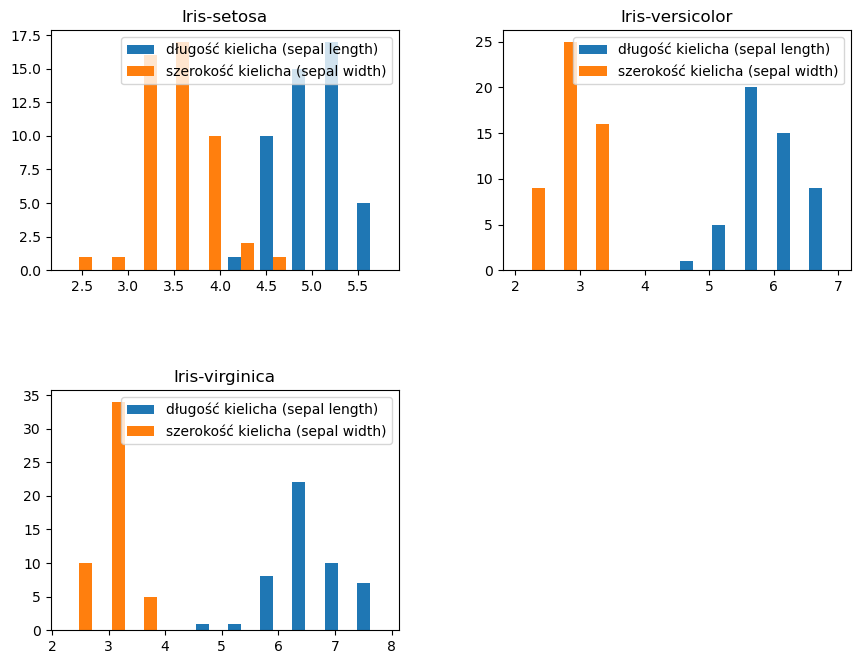

In [10]:
df.hist(column=['długość kielicha (sepal length)', 'szerokość kielicha (sepal width)'], by='klasa (class)',  xrot=0, figsize=(10, 8), legend=True) 

### Analiza rozmiarów płatków

array([[<Axes: title={'center': 'Iris-setosa'}>,
        <Axes: title={'center': 'Iris-versicolor'}>],
       [<Axes: title={'center': 'Iris-virginica'}>, <Axes: >]],
      dtype=object)

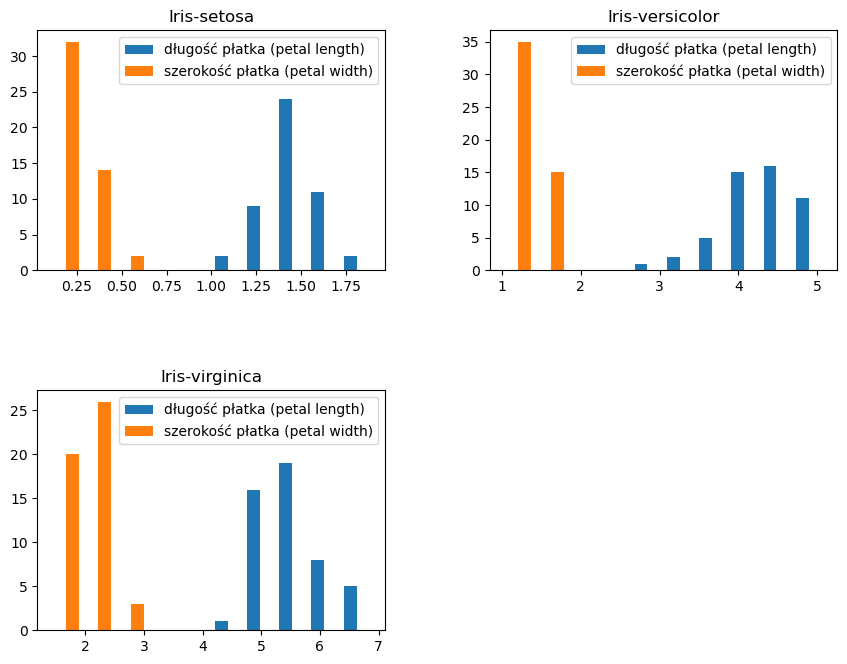

In [11]:
df.hist(column=['długość płatka (petal length)', 'szerokość płatka (petal width)'], by='klasa (class)',  xrot=0, figsize=(10, 8), legend=True) 

### Wnioski z analizy poszczególnych parametrów
* Długość kielicha Iris-setosa jest nico mniejsza niż Iris-virginica i Iris-versicolor, podczas, gdy dwa ostatnie są zbliżone do sibie wymiarami
* Rozmiary płatków Iris-setosa sa znacząco mniejsze niż Iris-virginica i Iris-versicolor

## 3. Analiza zależności między danymi

### Macierz korelacji dla Iris-setosa

In [12]:
# Filtrujemy 'Iris-setosa'
iris_setosa_df = df[df['klasa (class)'] == 'Iris-setosa']

# tworzymy macierz korelacji dla 'Iris-setosa'
correlation_matrix_setosa = iris_setosa_df.drop(columns=['klasa (class)']).corr()

#pokazujemy macierz korelacji dla 'Iris-setosa'
correlation_matrix_setosa

,długość kielicha (sepal length),szerokość kielicha (sepal width),długość płatka (petal length),szerokość płatka (petal width)
długość kielicha (sepal length),1.000000,0.748698,0.267285,0.273107
szerokość kielicha (sepal width),0.748698,1.000000,0.187016,0.245430
długość płatka (petal length),0.267285,0.187016,1.000000,0.331412
szerokość płatka (petal width),0.273107,0.245430,0.331412,1.000000


### Macierz korelacji dla Iris-versicolor

In [13]:
# Filtrujemy 'Iris-versicolor'
iris_versicolor_df = df[df['klasa (class)'] == 'Iris-versicolor']

# tworzymy macierz korelacji dla 'Iris-versicolor'
correlation_matrix_versicolor = iris_versicolor_df.drop(columns=['klasa (class)']).corr()

#pokazujemy macierz korelacji dla 'Iris-versicolor'
correlation_matrix_versicolor

,długość kielicha (sepal length),szerokość kielicha (sepal width),długość płatka (petal length),szerokość płatka (petal width)
długość kielicha (sepal length),1.000000,0.525911,0.754049,0.546461
szerokość kielicha (sepal width),0.525911,1.000000,0.560522,0.663999
długość płatka (petal length),0.754049,0.560522,1.000000,0.786668
szerokość płatka (petal width),0.546461,0.663999,0.786668,1.000000


In [14]:
# Filtrujemy 'Iris-virginica'
iris_virginica_df = df[df['klasa (class)'] == 'Iris-virginica']

# tworzymy macierz korelacji dla 'Iris-virginica'
correlation_matrix_virginica = iris_virginica_df.drop(columns=['klasa (class)']).corr()

#pokazujemy macierz korelacji dla 'Iris-virginica'
correlation_matrix_virginica

,długość kielicha (sepal length),szerokość kielicha (sepal width),długość płatka (petal length),szerokość płatka (petal width)
długość kielicha (sepal length),1.000000,0.445797,0.862951,0.274282
szerokość kielicha (sepal width),0.445797,1.000000,0.392242,0.534810
długość płatka (petal length),0.862951,0.392242,1.000000,0.317198
szerokość płatka (petal width),0.274282,0.534810,0.317198,1.000000


Uwaga: Zaobserwowane zróżnicowanie w macierzach korelacji dla różnych klas skłaniają do dalszej analizy różnic proporcji 

### Badanie zależności między długością i szerokością kielicha

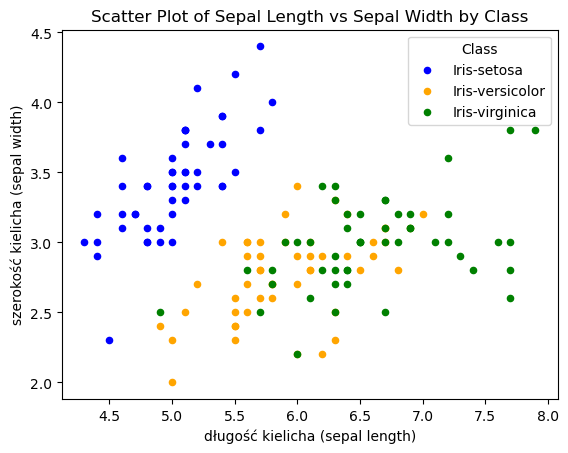

In [15]:
import matplotlib.pyplot as plt

df = df
ax = df[df['klasa (class)'] == 'Iris-setosa'].plot.scatter(x='długość kielicha (sepal length)', y='szerokość kielicha (sepal width)', color='blue', label='Iris-setosa')
df[df['klasa (class)'] == 'Iris-versicolor'].plot.scatter(x='długość kielicha (sepal length)', y='szerokość kielicha (sepal width)', color='orange', label='Iris-versicolor', ax=ax)
df[df['klasa (class)'] == 'Iris-virginica'].plot.scatter(x='długość kielicha (sepal length)', y='szerokość kielicha (sepal width)', color='green', label='Iris-virginica', ax=ax)
plt.title('Scatter Plot of Sepal Length vs Sepal Width by Class')
plt.legend(title='Class')
plt.show()

### Badanie zależności między długością i szerokością płatków

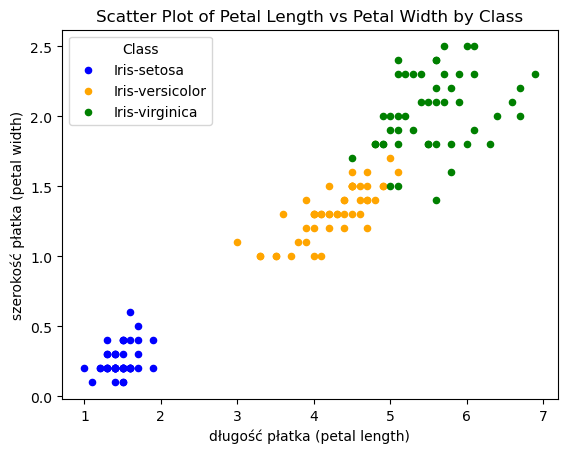

In [16]:
import matplotlib.pyplot as plt

df = df
ax = df[df['klasa (class)'] == 'Iris-setosa'].plot.scatter(x='długość płatka (petal length)', y='szerokość płatka (petal width)', color='blue', label='Iris-setosa')
df[df['klasa (class)'] == 'Iris-versicolor'].plot.scatter(x='długość płatka (petal length)', y='szerokość płatka (petal width)', color='orange', label='Iris-versicolor', ax=ax)
df[df['klasa (class)'] == 'Iris-virginica'].plot.scatter(x='długość płatka (petal length)', y='szerokość płatka (petal width)', color='green', label='Iris-virginica', ax=ax)
plt.title('Scatter Plot of Petal Length vs Petal Width by Class')
plt.legend(title='Class')
plt.show()

### Wnioski z analizy zależności między danymi
* Porównanie macierzy korelacji dla badanych odmian Iris wskazuje na istotne różnice w zależnościach między wymiarów
* Podczas, gdy kileich Iris-setosa jest mniejszy i bardziej owalny, kielichy Iris-versicolor i ris-virginica są bardziej podłużne
* Rozmiary płatków Iris-setosa wykazują mniejsze zależności od rozmiarów kielicha niż dla pozostały i pozostają wyrażnie drobniejsze

## 5. Analiza wartości odstających

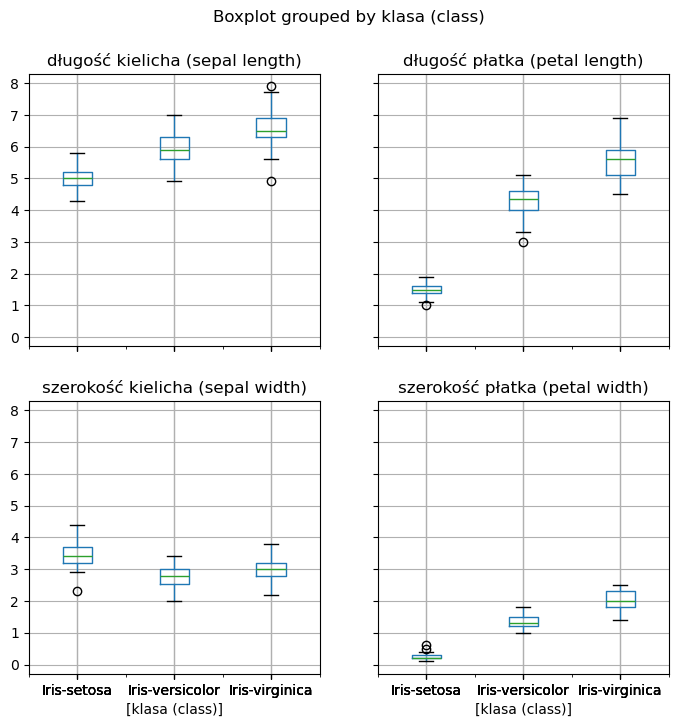

In [17]:

# Plotting boxplot using pandas
boxplot = df.boxplot(by='klasa (class)',  figsize=(8, 8))
#df.plot(kind='box')

### Wnioski z analizy wartości odstających
* Wyniki anlizy w większości wskazują na stosunkowo niskie odchylenia wartości średnich wartośi dla badanych próbek z wyjątkiem kilku przypadków; długośc i szerokość płatków dla Iris-setosa wykazuje niewielkie odchylenia of mocno skupionych watrości, co może wskazywać bład dokładności pomiaru
* Iris-virginica wykazuje kilka wartości o dośc dużym odchyleniu dla pomiaru deługości i szerokości kielicha. Przyczyna odchyleń może wymagać dalszej analizy
* Pojedynczy przypadek istotnego odchylenia wartości pomiaru dla długości płatka Iris-versicolor. 

## 6. Wnioski końcowe

Przeprowadzona analiza danych wykazała zadowalającą jakość i kompletność tych danychi pozwoliła na zaobserwowanie dobrze zdefiniowanych zależności.
Obsracja wykazała istotne różnice miedzy Iris-setosa i pozostałymi gatunkami. Nieiwlka liczba wartości odstających od reszty pomiarów nie ma istotnego wpływu na całokształt 